In [3]:
import logging
import os
logger = logging.getLogger(__name__)
from datetime import datetime


In [1]:
import os
import logging
from datetime import datetime

class Log:
    def __init__(self, log_dir='..\logs'):
        # Create log directory path
        self.log_path = os.path.join(os.getcwd(), log_dir)

        # Create the directory if it doesn't exist
        os.makedirs(self.log_path, exist_ok=True)

        print(f"Log directory created at: {self.log_path}")

    def log_file(self):
        # Generate log file name with timestamp
        log_file = f"{datetime.now().strftime('%d-%m-%Y %I-%M-%S-%p')}.log"

        # Create the full log file path
        log_file_path = os.path.join(self.log_path, log_file)

        # Write initial log entry
        with open(log_file_path, "w") as f:
            f.write("Log file created successfully!\n")

        print(f"Log file created at: {log_file_path}")

        # Configure logging
        logging.basicConfig(level=logging.INFO,
                            filename=log_file_path,
                            format="[%(asctime)s] %(lineno)d %(name)s - %(levelname)s - %(message)s")

        return log_file_path  # Returning log file path in case needed

# Usage
log_instance = Log()
log_instance.log_file()


Log directory created at: d:\Datascience\fullstackdsproject\notebooks\..\logs
Log file created at: d:\Datascience\fullstackdsproject\notebooks\..\logs\26-03-2025 07-23-28-PM.log


'd:\\Datascience\\fullstackdsproject\\notebooks\\..\\logs\\26-03-2025 07-23-28-PM.log'

In [3]:
path  = '..\logs'

log_file = f"{datetime.now().strftime('%d-%m-%Y %I-%M-%S %p')}.log"
# log_file

log_file_path = os.path.join(path, log_file)

# with open(log_file_path, "w") as f:
#     f.write("Log file created successfully!\n")

# print(f"Log file created at: {log_file_path}")

In [4]:

logging.basicConfig(level=logging.INFO, 
                    filename=log_file_path,
                    format="[%(asctime)s] %(lineno)d %(name)s - %(levelname)s - %(message)s")



In [54]:
import sys
import traceback

class CustomException(Exception):
    def __init__(self, errormessage):
        self.errormessage = errormessage
        self.error_trace = traceback.format_exc()  # Captures traceback as a string

    def __str__(self):
        # return f"Error occurred:\n{self.error_trace}\n Error message: {self.errormessage}" 
        return f"Error occurred:\n{self.error_trace[41:]}\n Error message: {self.errormessage}" 


if __name__ == "__main__": # script is imported into another module, the code inside if __name__ == "__main__": will not run automatically.
    try:
        # a = 9 / 0  # This will raise ZeroDivisionError
        pass
    except Exception as e:
        raise CustomException(e)



In [55]:
# use in another python file 
# from CustomException import CustomException  # Import the class

try:
    # Simulating a data length mismatch error
    data = [1, 2, 3]
    if len(data) != 5:
        raise ValueError("Data length mismatch error!")  # Example error
    
except Exception as e:
    raise CustomException(e)

CustomException: Error occurred:
 "C:\Users\shalman\AppData\Local\Temp\ipykernel_25292\3278897370.py", line 8, in <module>
    raise ValueError("Data length mismatch error!")  # Example error
ValueError: Data length mismatch error!

 Error message: Data length mismatch error!

Data Ingestion - read the raw data and split train n test.csv 

In [1]:
import os 
import pandas as pd
from sklearn.model_selection import train_test_split


class DataIngestionConfig:
    raw_data_path = os.path.join(r'..\artificats', 'raw.csv')
    train_data_path = os.path.join(r'..\artificats', 'train.csv')
    test_data_path = os.path.join(r'..\artificats', 'test.csv')

   

class DataIngestion:


    def __init__(self):
        self.DataIngestionConfig = DataIngestionConfig()

    def initiate_dataingestion(self):
        try:

            #read the csv under the data folder
            data =pd.read_csv(r'D:\Datascience\fullstackdsproject\notebooks\data\gemstone.csv')
            print(data)

            #creating directory
            os.makedirs(os.path.dirname(os.path.join(self.DataIngestionConfig.raw_data_path)),exist_ok=True)

            #exporting to that raw data path
            data.to_csv((self.DataIngestionConfig.raw_data_path),index =False)

            #split the train n test data 
            train_data, test_data = train_test_split(data, test_size=0.33, random_state=42)

            train_data.to_csv((self.DataIngestionConfig.train_data_path),index =False)
            test_data.to_csv((self.DataIngestionConfig.test_data_path),index =False)


            return (

                self.DataIngestionConfig.raw_data_path,
                self.DataIngestionConfig.train_data_path,
                self.DataIngestionConfig.test_data_path

            )

        except Exception as e:
            print(f"error occured at {e}")

# Running the ingestion process
if __name__ == "__main__":
    ingestion = DataIngestion()
    ingestion.initiate_dataingestion()

            id  carat        cut color clarity  depth  table     x     y  \
0            0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33   
1            1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12   
2            2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73   
3            3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41   
4            4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61   
...        ...    ...        ...   ...     ...    ...    ...   ...   ...   
193568  193568   0.31      Ideal     D    VVS2   61.1   56.0  4.35  4.39   
193569  193569   0.70    Premium     G    VVS2   60.3   58.0  5.75  5.77   
193570  193570   0.73  Very Good     F     SI1   63.1   57.0  5.72  5.75   
193571  193571   0.34  Very Good     D     SI1   62.9   55.0  4.45  4.49   
193572  193572   0.71       Good     E     SI2   60.8   64.0  5.73  5.71   

           z  price  
0       4.55  13619  
1       5.05  13387  
2       3.50   2772  

Data Transformation  - handling the missing value, seggreggating the category and numerical value, setting up the pipeline, preprocessors

In [ ]:
# Data Transformation  - handling the missing value, seggreggating the category and numerical value, setting up the pipeline, preprocessors

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from src.DiamondPricePrediction.components.data_ingestion import *
from sklearn.impute import SimpleImputer

from dataclasses import dataclass # this have __init__ method inside just to call as decorator
import os
import numpy as np

class DataTransformationConfig:
    def __init__(self):
       processor_obj_file_path = os.path.join('artificats', 'preprocessor.pkl')


class DataTransformation:

    def __init__(self):
        self.DataTransformationConfig = DataTransformationConfig()


    def get_data_transformation(self):
        
        data = pd.read_csv(r'D:\Datascience\fullstackdsproject\artificats\raw.csv')
        #categorical_columns

        # categorical_columns =data.select_dtypes(include=object).columns
        # categorical_columns = list(categorical_columns)
        # print(categorical_columns)
        
        #numerical columns
        # numerical_columns =data.select_dtypes(exclude=object).columns
        # numerical_columns = numerical_columns.drop(['id'])
        # numerical_columns = list(numerical_columns)
        # print(numerical_columns)

        #assign the ordinal encoding basis of the data which we have done already in Model_Training

        logging.info('Data Transformation initiated')
            
        # Define which columns should be ordinal-encoded and which should be scaled
        categorical_cols = ['cut', 'color','clarity']
        numerical_cols = ['carat', 'depth','table', 'x', 'y', 'z']
            
        # Define the custom ranking for each ordinal variable
        cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
        color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
        clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
        
        logging.info('Pipeline Initiated')
            
            ## Numerical Pipeline
        num_pipeline=Pipeline(
                steps=[
                ('imputer',SimpleImputer(strategy='median')),
                ('scaler',StandardScaler())

                ]

            )
            
            # Categorigal Pipeline
        cat_pipeline=Pipeline(
                steps=[
                ('imputer',SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
                ('scaler',StandardScaler())
                ]

            )
            
        preprocessor=ColumnTransformer([
            ('num_pipeline',num_pipeline,numerical_cols),
            ('cat_pipeline',cat_pipeline,categorical_cols)
            ])
            
        return preprocessor
            

            
            
        
    # except Exception as e:
    #         logging.info("Exception occured in the initiate_datatransformation")

    #         raise customexception(e,sys)


    def initiate_data_transformation(self):

        # access the train n test data
        train_df = pd.read_csv(r'D:\Datascience\fullstackdsproject\artificats\test.csv')
        test_df = pd.read_csv(r'D:\Datascience\fullstackdsproject\artificats\test.csv')

        preprocessing_obj = self.get_data_transformation()

        #split the data into test and train 
         
        target_column_name = 'price'
        drop_columns = [target_column_name,'id']
            
        input_feature_train_df = train_df.drop(columns=drop_columns,axis=1)
        target_feature_train_df=train_df[target_column_name]
            
            
        input_feature_test_df=test_df.drop(columns=drop_columns,axis=1)
        target_feature_test_df=test_df[target_column_name]
        

        #X train and X test
            
        input_feature_train_arr=preprocessing_obj.fit_transform(input_feature_train_df)
            
        input_feature_test_arr=preprocessing_obj.transform(input_feature_test_df)
        
 

        # print(input_feature_train_arr)
        # print(input_feature_test_df)

        logging.info("Applying preprocessing object on training and testing datasets.")
        
        #need to pass this as array 
        train_arr = np.c_[input_feature_train_arr, np.array(target_feature_train_df)]
        test_arr = np.c_[input_feature_test_arr, np.array(target_feature_test_df)]
        
        #it will have both independent and target feature 
        # print(train_arr)

        return(
            train_arr,
            test_arr
        )



if __name__ == "__main__":
    DataTransformation = DataTransformation()
    DataTransformation.get_data_transformation()
    DataTransformation.initiate_data_transformation()


[[-6.25388453e-01  2.60539204e-01 -1.14460391e-01 ... -1.54493893e+00
  -6.50574776e-01  1.35500000e+03]
 [ 2.63255496e+00 -2.13975120e+00 -1.14460391e-01 ...  3.05951259e-01
  -1.31613188e+00  1.46910000e+04]
 [-1.12493978e+00 -1.21656258e+00  9.26059005e-01 ... -9.27975531e-01
   2.01165364e+00  8.44000000e+02]
 ...
 [-4.95070716e-01 -4.78011689e-01  9.26059005e-01 ... -9.27975531e-01
   1.49823281e-02  1.81800000e+03]
 [-1.25837129e-01  4.45176928e-01  9.26059005e-01 ...  1.53987805e+00
  -1.31613188e+00  2.02800000e+03]
 [ 5.25751553e-01 -1.49351917e+00 -6.34720089e-01 ... -9.27975531e-01
  -1.31613188e+00  5.08200000e+03]]


In [ ]:
category_pipeline = Pipeline(
    steps=[
        ('cat_imputer',SimpleImputer(strategy='most_frequent')), #handling missing values mode in terms of category
        ('cat_encoder', OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories])), # to convert the category to numerical
        ('scaler', StandardScaler()), #mean 0 and std is 1
]
)
category_pipeline 

    
            

Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                ('cat_encoder',
                 OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good',
                                             'Premium', 'Ideal'],
                                            ['D', 'E', 'F', 'G', 'H', 'I', 'J'],
                                            ['I1', 'SI2', 'SI1', 'VS2', 'VS1',
                                             'VVS2', 'VVS1', 'IF']])),
                ('scaler', StandardScaler())])

In [79]:
numerical_pipeline = Pipeline(
    steps=[
        ('num_imputer',SimpleImputer(strategy='median')), #handling missing values median in terms of outliers
        ('scaler', StandardScaler()), #mean 0 and std is 1
]
)
numerical_pipeline 


Pipeline(steps=[('num_imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [82]:
preprocessor  = ColumnTransformer(
    [('numerical_pipeline', numerical_pipeline, numerical_columns),
    ('categorical_columns', category_pipeline, categorical_columns)
    ]
)
preprocessor

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['carat', 'depth', 'table', 'x', 'y', 'z',
                                  'price']),
                                ('categorical_columns',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['D',
                                                                              'E',
                                                                              'F',
                                                                              'G',
                                                                              'H',
                                                                              'I',
                                                                              'J'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']])),
                                                 ('scaler', StandardScaler())]),
                                 ['cut', 'color', 'clarity'])])

In [94]:
# access the train n test data
train_df = pd.read_csv(r'D:\Datascience\fullstackdsproject\artificats\test.csv')
test_df = pd.read_csv(r'D:\Datascience\fullstackdsproject\artificats\test.csv')
train_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,14868,0.50,Ideal,D,SI1,62.1,57.0,5.05,5.08,3.14,1355
1,165613,2.00,Very Good,G,SI2,59.5,57.0,8.08,8.15,4.89,14691
2,96727,0.27,Premium,E,VVS1,60.5,59.0,4.19,4.16,2.52,844
3,145593,0.32,Premium,I,VVS1,61.2,59.0,4.43,4.44,2.71,707
4,118689,1.19,Ideal,H,SI1,62.5,56.0,6.77,6.81,4.23,5797


In [ ]:
#model training
from src.DiamondPricePrediction.components.data_transformation import DataTransformation
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
# from src.DiamondPricePrediction.utils.utils import evaluating_scores
import numpy as np

@dataclass
class ModelTrainerConfig:
    modeltrainer_file_path = os.path.join('artificats', 'model.pkl')

class ModelTrainer:
    def __init__(self):
        self.ModelTrainerConfig = ModelTrainerConfig()

    

    def initiatemodeltraining(self, train_array, test_array):
         

        model_list =[]
        r2_list = []
        
        #to find the best model
        best_model = None
        best_r2 = -float("inf") # Start with the lowest possible R² score
        print(best_r2)

        #it will have both independent and target feature so splitting out 
        X_train, y_train, X_test, y_test = (
            train_array[:,:-1],
            train_array[:, -1], 
            test_array[:, :-1], 
            test_array[:, -1]
        )
        
  

        # print(train_array)

        # print(train_array[:,:-1])


        models ={
            'linear':LinearRegression(),
            'Ridge':Ridge(),
            'Lasso':Lasso(),
            'ElasticNet':ElasticNet()
        }

        
        for i in range(len(list(models))):
            
            model = list(models.values())[i]
            # print(model)
            model.fit(X_train, y_train)
            y_predict = model.predict(X_test)
            print("training score", model.score(X_train, y_train))

            #validation part 
            mae, rmse, r2_square, mse = evaluating_scores(y_predict, y_test)
            print(model)
            model_list.append(model)
            
            print("Model Training Performance")
            print("RMSE:", rmse)
            print("MAE:", mae)
            print("MSE:", mse)
            print(f"R² Score: {r2_square * 100:.2f}%")
            r2_list.append(r2_square)
            print('='*35)

            if r2_square > best_r2:
                best_r2 = r2_square
                best_model = model

        
        if best_model:

            print(f"\n✅ Best Model Saved: {best_model} with R² Score: {best_r2*100}")
            


    

if __name__=="__main__":
    ModelTrainer = ModelTrainer()
    data_transformation = DataTransformation()
    train_array, test_array = data_transformation.initiate_data_transformation()  
    ModelTrainer.initiatemodeltraining(train_array, test_array)





[[-0.62538845  0.2605392  -0.11446039 ...  0.86988804 -1.54493893
  -0.65057478]
 [ 2.63255496 -2.1397512  -0.11446039 ... -1.14386281  0.30595126
  -1.31613188]
 [-1.12493978 -1.21656258  0.926059   ... -0.13698739 -0.92797553
   2.01165364]
 ...
 [-0.49507072 -0.47801169  0.926059   ... -0.13698739 -0.92797553
   0.01498233]
 [-0.12583713  0.44517693  0.926059   ... -1.14386281  1.53987805
  -1.31613188]
 [ 0.52575155 -1.49351917 -0.63472009 ...  0.86988804 -0.92797553
  -1.31613188]]
       carat        cut color clarity  depth  table     x     y     z
0       0.50      Ideal     D     SI1   62.1   57.0  5.05  5.08  3.14
1       2.00  Very Good     G     SI2   59.5   57.0  8.08  8.15  4.89
2       0.27    Premium     E    VVS1   60.5   59.0  4.19  4.16  2.52
3       0.32    Premium     I    VVS1   61.2   59.0  4.43  4.44  2.71
4       1.19      Ideal     H     SI1   62.5   56.0  6.77  6.81  4.23
...      ...        ...   ...     ...    ...    ...   ...   ...   ...
63875   0.41    Pr

In [ ]:
#utils.py - to keep the evaluate scores to keep the code simple

def evaluating_scores(true, predict):
   
    # rmse = np.sqrt(mean_squared_error(true, predict))
    r2_square = r2_score(true, predict)
    mse = mean_squared_error(true, predict)
    mae = mean_absolute_error(true, predict)
    return mae, rmse, r2_square, mse



In [263]:
import pickle
def saveobject( obj):

    file_path = r'\fullstackdsproject\artificats'

    dir = os.path.join(file_path)

    os.makedirs(os.path.dirname(dir),  exist_ok =True)

    with open(file_path, "wb") as file_obj:
            pickle.dump(obj, file_obj)



saveobject('prepc.pkl')


In [6]:
from src.DiamondPricePrediction.components.data_ingestion import *
from src.DiamondPricePrediction.components.data_transformation import *
from src.DiamondPricePrediction.components.model_trainer import *
from src.DiamondPricePrediction.utils.utils import evaluating_scores

data_ingestion = DataIngestion()
data_ingestion.initiate_dataingestion()

data_transformation = DataTransformation()
train_arr, test_arr = data_transformation.initiate_data_transformation()

model_trainer = ModelTrainer()
model_trainer.initiatemodeltraining(train_arr, test_arr)

            id  carat        cut color clarity  depth  table     x     y  \
0            0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33   
1            1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12   
2            2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73   
3            3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41   
4            4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61   
...        ...    ...        ...   ...     ...    ...    ...   ...   ...   
193568  193568   0.31      Ideal     D    VVS2   61.1   56.0  4.35  4.39   
193569  193569   0.70    Premium     G    VVS2   60.3   58.0  5.75  5.77   
193570  193570   0.73  Very Good     F     SI1   63.1   57.0  5.72  5.75   
193571  193571   0.34  Very Good     D     SI1   62.9   55.0  4.45  4.49   
193572  193572   0.71       Good     E     SI2   60.8   64.0  5.73  5.71   

           z  price  
0       4.55  13619  
1       5.05  13387  
2       3.50   2772  

NameError: name 'evaluating_scores' is not defined

In [9]:
def load_object(filepath):
    with open(filepath, 'rb') as fb:
        return pickle.load(fb)

# load_object(r"D:\Datascience\fullstackdsproject\artifacts\preprocessor.pkl")

In [ ]:
import os, pickle 
import sys
from src.DiamondPricePrediction.components import *
from src.DiamondPricePrediction.utils.utils import *

class PredictPipeline:
    def __init__(self):
        pass

    def predict_data(self, features):
       preprocessor_path =  os.path.join(r"D:\Datascience\fullstackdsproject\artifacts\preprocessor.pkl")
       model_path =  os.path.join(r"D:\Datascience\fullstackdsproject\artifacts\model.pkl")
       preprocessor = load_object(preprocessor_path)
       model = load_object(model_path)
       
       #preprocessing
       scaled_data = preprocessor.fit_transform(features) #features - file or the dataframe
       predict = model.predict(scaled_data)

       return predict

       



Log directory created at: d:\Datascience\fullstackdsproject\notebooks\..\logs
Log file created at: d:\Datascience\fullstackdsproject\notebooks\..\logs\29-03-2025 03-55-30-PM.log


In [49]:
import pandas as pd

# Creating a class for passing the parameters which are independent variables
class CustomData:
    def __init__(self, carat: float,
                 depth: float,
                 table: float,
                 x: float,
                 y: float,
                 z: float,
                 cut: str,
                 color: str,
                 clarity: str):

        self.carat = carat
        self.depth = depth
        self.table = table
        self.x = x
        self.y = y
        self.z = z
        self.cut = cut
        self.color = color
        self.clarity = clarity

    def get_as_dataframe(self):
        """Creates and returns a DataFrame from the object's attributes."""
        create_dict = {
            'carat': [self.carat],
            'depth': [self.depth],
            'table': [self.table],
            'x': [self.x],
            'y': [self.y],
            'z': [self.z],
            'cut': [self.cut],
            'color': [self.color],
            'clarity': [self.clarity],
        }

        return pd.DataFrame(create_dict)  # Ensure the DataFrame is returned


# if __name__ == '__main__': 
#     custom_data = CustomData(2.01, 58.7, 58.0, 8.2, 8.17, 4.82, "Premium", "I", "SI2")  # Instance
#     df = custom_data.get_as_dataframe()  # Store the returned DataFrame
#     print(df)  # Print the DataFrame


In [29]:
#predicting the single dataset with the loaded model

#call the CustomData and assign the values and call the (get_as_dataframe) method to dataframe and pass to predict class

custom_data = CustomData(2.01, 58.7, 58.0, 8.2, 8.17, 4.82, "Premium", "I", "SI2")
df = custom_data.get_as_dataframe()


predictor = PredictPipeline()  # ✅ Instantiate the class before calling predict()
predicted_price = predictor.predict_data(df)  # ✅ Correct call
print(f"Predicted Price: {predicted_price}")

Prediction  = PredictPipeline()
predicted_price  = Prediction.predict_data(df)
print(f"result {predicted_price[0]}")


NameError: name 'CustomData' is not defined

#testing with the fileupload

In [ ]:
import pandas as pd

# Creating a class for passing the parameters which are independent variables
class CustomDataUpload:
    def __init__(self):
        pass
    def get_as_dataframe(self):
        
        df = pd.read_csv(r"D:\Datascience\fullstackdsproject\notebooks\data\playground-series-s3e8\train.csv")

        return df # Ensure the DataFrame is returned


# if __name__ == '__main__': 
#     custom_upload_data = CustomDataUpload()  # Instance
#     df = custom_upload_data.get_as_dataframe()  # Store the returned DataFrame
#     print(df)  # Print the DataFrame


            id  carat        cut color clarity  depth  table     x     y  \
0            0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33   
1            1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12   
2            2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73   
3            3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41   
4            4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61   
...        ...    ...        ...   ...     ...    ...    ...   ...   ...   
193568  193568   0.31      Ideal     D    VVS2   61.1   56.0  4.35  4.39   
193569  193569   0.70    Premium     G    VVS2   60.3   58.0  5.75  5.77   
193570  193570   0.73  Very Good     F     SI1   63.1   57.0  5.72  5.75   
193571  193571   0.34  Very Good     D     SI1   62.9   55.0  4.45  4.49   
193572  193572   0.71       Good     E     SI2   60.8   64.0  5.73  5.71   

           z  price  
0       4.55  13619  
1       5.05  13387  
2       3.50   2772  

In [14]:
custom_upload_data = CustomDataUpload()  # Instance
df = custom_upload_data.get_as_dataframe()


predicted_data  = PredictPipeline()
predict_price = predicted_data.predict_data(df)

predict_price= pd.DataFrame(predict_price, columns=['predicted price(target)'])

predict_price




,predicted price(target)
0,10975.620337
1,14388.656725
2,3207.464807
3,600.158504
4,12373.061616
...,...
193568,1874.055790
193569,3539.408317
193570,2603.915891
193571,453.668685


In [20]:
#merge the predicted with the raw data

finaldf_merged = pd.concat([df, predict_price], axis=1)
finaldf_merged

,id,carat,cut,color,clarity,depth,table,x,y,z,price,predicted price(target)
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619,10975.620337
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387,14388.656725
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772,3207.464807
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666,600.158504
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453,12373.061616
...,...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130,1874.055790
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874,3539.408317
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036,2603.915891
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681,453.668685


Conclusion:

Use .merge() if you have a common column (like an ID) or create index or id or common column between the datsets.

Use .join() if you are merging on the index.

Use on='column_name' if the column name is the same in both DataFrames.

Use left_on='col1', right_on='col2' if the column names differ.



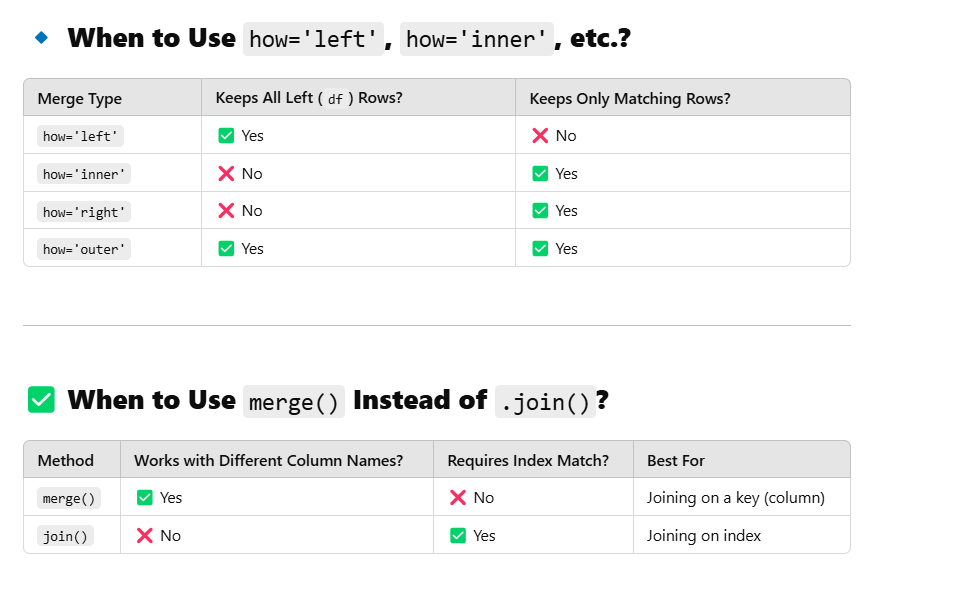

In [24]:
"""
Understanding how in pd.merge()


df = pd.merge(df, predict_price, left_on='index_col', right_on='id', how='...')

how	Behavior

left -	Keep all rows from df (left DataFrame) and only matching rows from predict_price (right DataFrame).Unmatched rows in predict_price get NaN.
right -	Keep all rows from predict_price and only matching rows from df. Unmatched rows in df get NaN. 
inner -	Keep only matching rows from both df and predict_price (like an intersection).
outer -	Keep all rows from both df and predict_price. Unmatched rows get NaN in missing columns.

"""

"\nUnderstanding how in pd.merge()\n\n\ndf = pd.merge(df, predict_price, left_on='index_col', right_on='id', how='...')\n\nhow\tBehavior\n\nleft -\tKeep all rows from df (left DataFrame) and only matching rows from predict_price (right DataFrame).Unmatched rows in predict_price get NaN.\nright -\tKeep all rows from predict_price and only matching rows from df. Unmatched rows in df get NaN. \ninner -\tKeep only matching rows from both df and predict_price (like an intersection).\nouter -\tKeep all rows from both df and predict_price. Unmatched rows get NaN in missing columns.\n\n"

In [26]:
# export to output file

os.makedirs(os.path.join(r"D:\Datascience\fullstackdsproject\Api\api\output"), exist_ok=True)
# os.makedirs(upload_dir, exist_ok=True)  # Create directory if not exists
# print(os.makedirs(upload_dir))

In [28]:
import pandas as pd
finaldf_merged = pd.concat([df, result], axis=1)
finaldf_merged.to_csv(r"D:\Datascience\fullstackdsproject\Api\api\output\mergedoutput.csv")    
    


NameError: name 'df' is not defined

In [ ]:
BASE_DIR = os.path.dirname(os.path.dirname())  # This should be your project root

# Construct the correct path for the preprocessor.pkl file
PREPROCESSOR_PATH = os.path.abspath(os.path.join(BASE_DIR, "artifacts", "preprocessor.pkl"))

# Debugging
print("Base Directory:", BASE_DIR)
print("Looking for file at:", PREPROCESSOR_PATH)

# Verify if file exists
if not os.path.exists(PREPROCESSOR_PATH):
    raise FileNotFoundError(f"File not found at: {PREPROCESSOR_PATH}")

# Load the file
import pickle
with open(PREPROCESSOR_PATH, "rb") as file:
    preprocessor = pickle.load(file)

print("Preprocessor loaded successfully!")

NameError: name '__file__' is not defined

In [23]:
import sklearn
print(sklearn.__version__)

1.6.1


In [31]:
from src.DiamondPricePrediction.components.data_transformation import DataTransformation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import pandas as pd
import numpy as np
import mlflow, os
from src.DiamondPricePrediction.utils.utils import evaluating_scores, load_object


In [ ]:
class model_evaluation:
    def __init__(self):
        pass

    def evaluate_metrics(self, actual, predict):  #y, yhat
        r2_score = r2_score(actual, predict)
        mae = mean_absolute_error(actual, predict)
        rmse =     mean_squared_error(actual, predict)
        return rmse, mae, r2_score


    def initiate_evaluation(self, train_arr, test_arr):
       
     
       # load the data
        X_train, y_train, X_test, y_test = (
            train_array[:,:-1],
            train_array[:, -1], 
            test_array[:, :-1], 
            test_array[:, -1]
        )

        #load the model

        BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))

        # app_settings_path = os.path.join(r'D:\Datascience\fullstackdsproject\Api\appsettings.json')

        model_path = os.path.join(BASE_DIR, "artifacts", "linearRegression().pkl")

        model  = load_object(model_path)
       
        with mlflow.start_run():
        # will pass only the test data/validated data
            y_predict = model.predict(X_test)
            r2_score, mae, rmse = self.evaluate_metrics(y_test, y_predict)

            mlflow.log_metric("r2_score", r2_score)
            mlflow.log_metric("mae", mae)
            mlflow.log_metric("rmse", rmse)
            mlflow.set_tag("model evaluation info", "Basic LR model for gemstone data from kaggle")



if __name__ == "__main__":
    model_eval = model_evaluation()
    data_transformer = DataTransformation()  # <-- ✅ not same as class name
    train_array, test_array = data_transformer.initiate_data_transformation()
    model_eval.initiate_evaluation(train_array, test_array)





       


    

NameError: name '__file__' is not defined

In [35]:
from urllib.parse import urlparse


mlflow.set_registry_uri('https://dagshub.com/shalman13091994/fullstackdsproject.mlflow')\
        
tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
tracking_url_type_store

'file'

In [43]:
from urllib.parse import urlparse
from src.DiamondPricePrediction.components.data_transformation import DataTransformation




In [ ]:
import mlflow
from mlflow import pyfunc

#testing the saved model at mlflow model registry
def initiate_evaluation(train_arr, test_arr):
       
     
       # load the data
    X_train, y_train, X_test, y_test = (
            train_arr[:,:-1],
            train_arr[:, -1], 
            test_arr[:, :-1], 
            test_arr[:, -1]
        )
    
    mlflow.set_tracking_uri("https://dagshub.com/shalman13091994/fullstackdsproject.mlflow")


    model_uri = 'runs:/35a1f3e8516a407096cf20c59cef1c41/model'


    # Choose a sample from your test data
    input_data = pd.DataFrame([X_test[0]], columns=[f"feature_{i}" for i in range(X_test.shape[1])])


    # Replace INPUT_EXAMPLE with your own input example to the model
    # A valid input example is a data instance suitable for pyfunc prediction

    mlflow.pyfunc.load_model(model_uri=model_uri).predict(input_data)

    # Verify the model with the provided input data using the logged dependencies.
    # For more details, refer to:
    # https://mlflow.org/docs/latest/models.html#validate-models-before-deployment
    mlflow.models.predict(
        model_uri=model_uri,
        input_data=input_data,
        env_manager="local",
    )
    





if __name__ == "__main__":
    data_transformation  = DataTransformation()
    train_arr, test_arr =  data_transformation.initiate_data_transformation()
    initiate_evaluation(train_arr, test_arr)


d:\Ananconda\envs\venv\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
2025/04/05 16:59:29 INFO mlflow.models.python_api: It is highly recommended to use `uv` as the environment manager for predicting with MLflow models as its performance is significantly better than other environment managers. Run `pip install uv` to install uv. See https://docs.astral.sh/uv/getting-started/installation for other installation methods.
2025/04/05 16:59:30 INFO mlflow.models.flavor_backend_registry: Selected backend for flavor 'python_function'

{"predictions": [1615.0704670166933]}


d:\Ananconda\envs\venv\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
import mlflow
import pandas as pd

logged_model = 'runs:/35a1f3e8516a407096cf20c59cef1c41/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)


X_train, y_train, X_test, y_test = (
            train_arr[:,:-1],
            train_arr[:, -1], 
            test_arr[:, :-1], 
            test_arr[:, -1]
        )
    
print("train --",train_arr[:,:-1])
print('test --', test_arr[:, :-1])
    # Convert X_test to DataFrame if needed
X_test_df = pd.DataFrame(X_test)
print(X_test_df)
    # Predict
predictions = loaded_model.predict(X_test_df)

df['predictions'] = predictions
df.to_csv("output_with_predictions.csv", index=False)
df


train -- [[ 2.62606128 -2.88812879  0.40086761 ... -0.13093345  1.52565507
  -1.31469623]
 [-0.84529098  0.164716    0.92245845 ... -0.13093345 -0.93715888
  -0.64865626]
 [-0.84529098 -1.50047207  1.96564013 ... -0.13093345 -0.3214554
  -0.64865626]
 ...
 [ 0.92272694  0.90479959  0.40086761 ... -0.13093345  0.29424809
   0.01738371]
 [-1.03934172 -0.66787803 -0.64231407 ... -1.13633021  0.29424809
   2.01550362]
 [-1.03934172 -0.02030489  0.92245845 ... -1.13633021  0.29424809
  -1.31469623]]
test -- [[-0.62967904  0.25722645 -0.12072323 ...  0.87446332 -1.55286237
  -0.64865626]
 [ 2.60450008 -2.1480452  -0.12072323 ... -1.13633021  0.29424809
  -1.31469623]
 [-1.1255865  -1.22294072  0.92245845 ... -0.13093345 -0.93715888
   2.01550362]
 ...
 [-0.50031187 -0.48285713  0.92245845 ... -0.13093345 -0.93715888
   0.01738371]
 [-0.13377157  0.44224735  0.92245845 ... -1.13633021  1.52565507
  -1.31469623]
 [ 0.51306425 -1.50047207 -0.64231407 ...  0.87446332 -0.93715888
  -1.31469623]]


ValueError: Length of values (63880) does not match length of index (129693)

In [ ]:

#testing the dagshubflow model with the data

import mlflow
import pandas as pd

def mlflowtest(train_arr, test_arr):
    logged_model = 'runs:/35a1f3e8516a407096cf20c59cef1c41/model'

    # Load model as a PyFuncModel
    loaded_model = mlflow.pyfunc.load_model(logged_model)

    # Unpack data
    X_train, y_train, X_test, y_test = (
        train_arr[:, :-1],
        train_arr[:, -1], 
        test_arr[:, :-1], 
        test_arr[:, -1]
    )



    # Predict
    predictions = loaded_model.predict(X_test)

    # Combine into a result DataFrame
    result_df = X_test_df.copy()
    result_df['Actual'] = y_test
    result_df['Predicted'] = predictions

    # Save
    result_df.to_csv("output_with_predictions.csv", index=False)
    print(result_df.head())

if __name__ == "__main__":
    from src.DiamondPricePrediction.components.data_transformation import DataTransformation
    data_transformation = DataTransformation()
    train_arr, test_arr = data_transformation.initiate_data_transformation()
    mlflowtest(train_arr, test_arr)

          0         1         2         3         4         5         6  \
0 -0.629679  0.257226 -0.120723 -0.601058 -0.582072 -0.572731  0.874463   
1  2.604500 -2.148045 -0.120723  2.125144  2.197955  1.957782 -1.136330   
2 -1.125587 -1.222941  0.922458 -1.374832 -1.415174 -1.469255 -0.130933   
3 -1.017781 -0.575368  0.922458 -1.158895 -1.161621 -1.194514 -0.130933   
4  0.858043  0.627268 -0.642314  0.946489  0.984523  1.003417  0.874463   

          7         8   Actual     Predicted  
0 -1.552862 -0.648656   1355.0   1615.070467  
1  0.294248 -1.314696  14691.0  15103.984564  
2 -0.937159  2.015504    844.0   1726.259697  
3  1.525655  2.015504    707.0    677.152061  
4  0.909952 -0.648656   5797.0   6502.191870  
